<a href="https://colab.research.google.com/github/shpotes/TF-workshop/blob/master/MNIST/data-pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_datasets -Uq --user
try:
  %tensorflow_version 2.x
except:
  pass

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

tf.__version__

'2.0.0'

In [0]:
# to list all datasets:
#tfds.list_builders()
# also see: https://www.tensorflow.org/datasets/catalog/overview#all_datasets

In [0]:
oxford_102, info = tfds.load(
    name="oxford_flowers102",  # selects which dataset to load
    shuffle_files=True,        # automatically shuffle files
    with_info=True             # extra metadata about the dataset
)

In [0]:
train_ds = oxford_102["train"]
try:
    valid_ds = oxford_102["validation"]
    test_ds  = oxford_102["test"]
except Exception as e:
    print("Some datasets don't have a pre-defined validation/test set!")
    print(e)

In [6]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops._OptionsDataset

In [7]:
print("Dataset Name:")
print(info.name)
print("\nDataset Description:")
print(info.description)
print("Dataset Split:")
info.splits

Dataset Name:
oxford_flowers102

Dataset Description:

The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
in the United Kingdom. Each class consists of between 40 and 258 images. The images have
large scale, pose and light variations. In addition, there are categories that have large
variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set.
The training set and validation set each consist of 10 images per class (totalling 1020 images each).
The test set consists of the remaining 6149 images (minimum 20 per class).

Dataset Split:


{'test': <tfds.core.SplitInfo num_examples=6149>,
 'train': <tfds.core.SplitInfo num_examples=1020>,
 'validation': <tfds.core.SplitInfo num_examples=1020>}

Example: 0
Keys: dict_keys(['file_name', 'image', 'label'])


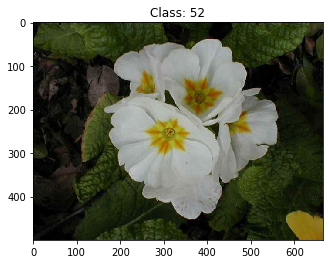

In [8]:
from matplotlib import pyplot as plt

# try changing the number of examples to take!

examples = train_ds.take(1)

for i, example in enumerate(examples):
    print("Example:", i)
    print("Keys:", example.keys())
    title_string = "Class: " + str(example["label"].numpy())
    plt.title(title_string)
    plt.imshow(example["image"])
    plt.show()

# Pipelines!

In [0]:
train_ds = tfds.load(
    name="oxford_flowers102", # selects which dataset to load
    split=tfds.Split.TRAIN,   # load training dataset directly
    shuffle_files=True,       # automatically shuffle files
    as_supervised=True        # return data as (image, label) tuple
)

In [0]:
IMG_SIZE = (224, 224)

@tf.function
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, IMG_SIZE)
    image = (image/255)
    return image, label

In [0]:
import multiprocessing

BATCH_SIZE = 9 # Viz propose
N_THREADS = multiprocessing.cpu_count()

train_ds = train_ds.shuffle(1024)
train_ds = train_ds.map(format_example,
                        num_parallel_calls=N_THREADS)  
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(1) #  tf.data.experimental.AUTOTUNE

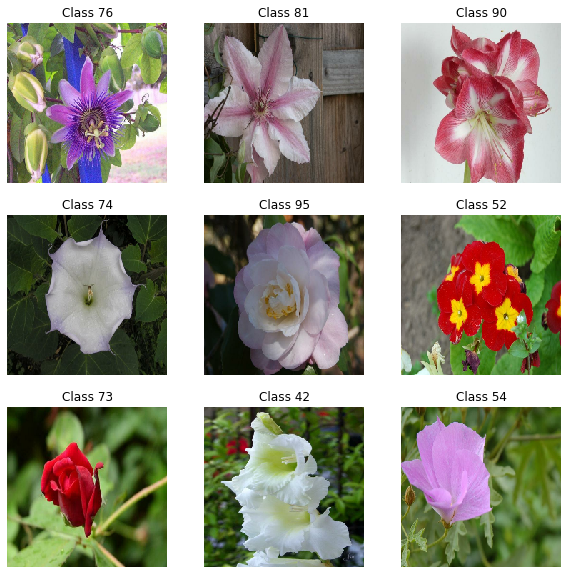

In [12]:
plt.figure(figsize=(10,10))

# try changing the number of batches to take below

batches = train_ds.take(1)

# iterate through the list of batches

for batch in batches:
    image_batch = batch[0]
    labels_batch = batch[1]
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.title("Class {}".format(labels_batch[i]))
        plt.imshow(image_batch[i])
        plt.axis("off")
    plt.show()